# Data Scientist Position Homework

## My Machine Learning Pipeline

> 1) The goal.

> 2) Fetch the data.

> 3) Gain insights from data also perform data sanity check.

> 4) Preprocess the data.

> 5) Explore different algorithms.

> 6) Short list best ones.

> 7) Combine them into a great solution.

> 8) Present your solution.

## GOAL:-

> Build a supervised classifier for the MNIST dataset that achieves a high accuracy (over 95% is easily achievable) on the test set.

Goal Takeaways:-

1) Build a supervised classifier.

2) Get an accuracy above 95%.

## Libraries used

In [191]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt

## Fetching the data

In [183]:
# Change data_home to wherever to where you want to download your data
mnist = fetch_mldata('MNIST original')

Description of the data

In [234]:
mnist.COL_NAMES

['label', 'data']

The mnist has both label and data which makes it a supervised learning algorithm. Also the data isn't linearly separable and the data is categorical.

In [184]:
mnist.DESCR

'mldata.org dataset: mnist-original'

Shape of the data

In [185]:
data=mnist.data
targets=mnist.target

In [193]:
data.shape

(70000, 784)

In [194]:
targets.shape

(70000,)

In [186]:
df=pd.concat([pd.DataFrame(data),pd.DataFrame(targets)],axis=1)

In [187]:
unique, counts = np.unique(targets, return_counts=True)

In [188]:
s=dict(zip(unique, counts))

In [189]:
m=list(s.keys())
m

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [190]:
l=list(s.values())
l

[6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]

# Dataset Sanity Check

### Checking if the data is Imbalanced

(array([6903., 7877., 6990., 7141., 6824., 6313., 6876., 7293., 6825.,
        6958.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

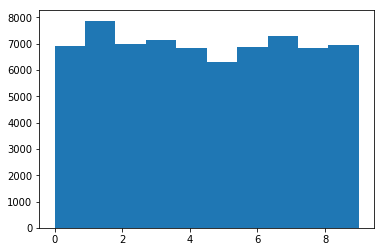

In [69]:
plt.hist(m,weights=l)

Helper Function to normalize the data

> From the above graph we see that the data is not imbalanced. But it has to be normalized, because:

> 1)Several algorithms, in particular SVM, can sometimes converge far faster on normalized data.

> 2)When the model is sensitive to magnitude, and the units of two different features are different, and arbitrary. Normalization has to be performed.

# Data Preprocessing

Helper Function to normalize the data

In [230]:
def normalize(a):
    max_input=np.max(a)
    min_input=np.min(a)
    return (a-min_input)/(max_input-min_input)

### Splitting the dataset to training, testing and validation

In [192]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(
    normalize(mnist.data), mnist.target, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=10000, random_state=42)

#### Shape of training, validation, testing

In [195]:
print("Shape of training set: ", X_train.shape)
print("Shape of test set: ", X_test.shape)
print("Shape of validation set: ", X_val.shape)

Shape of training set:  (50000, 784)
Shape of test set:  (10000, 784)
Shape of validation set:  (10000, 784)


## MULTINOMIAL LOGISTIC REGRESSION

In [196]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
# default solver is incredibly slow thats I changed it
logisticRegr = LogisticRegression(solver = 'lbfgs',C=0.5,max_iter=1000)

Fitting the training data

In [197]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

Score/Accuracy on the testing set

In [198]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.917


### Cross Validation

<b>Choice of 'n': </b>

In a paper I recently read https://dl.acm.org/citation.cfm?id=1643047 as Kohavi cited,

> If the training set is small, it is better to use a larger 'n'. This simulates having a larger training set. The choice of k involves a tradeoff between efficiency and the accuracy of the error prediction. More folds reduce the bias of the estimate of the generalization error, but they take more time to compute. Since the training set is large, a small value of 'n' is choosen.

> More training samples usually means that we are at a flatter part of the learning curve, so the difference between the surrogate models and the "real" model trained on all 'n' samples becomes negligible. 

How I choosed the value of 'n' and why?

In order to lower the variance of the CV result, I repeat/iterate the CV with new random splits. I tend to think mainly of the total number of models calculated (in analogy to bootstrapping). So I decided to go for 100 x 10-fold CV or 200 x 5-fold CV. I found the variance when cv=10 to be low so I opted the value 10.

In [200]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(logisticRegr,X_train,y_train,cv=10,scoring='accuracy')

In [201]:
print("Accuracies: ",score)

print("mean",score.mean())
print("std",score.std())

Accuracies:  [0.91625025 0.91505097 0.91405157 0.91505097 0.92021596 0.915
 0.91695017 0.91735041 0.91254753 0.91653323]
mean 0.9159001050000576
std 0.001981543562374655


From Deep Learning book by Ian Goodfellow, Algorithm A is better than algorithm B if upper bound of 95% CI for error of algorithm A is less than lower bound 95% CI for error of algorithm B.

Finding the 95% confidence interval

In [202]:
mean=score.mean()

In [203]:
mean-1.96*mean

-0.8792641008000553

In [204]:
mean+1.96*mean

2.7110643108001704

In [205]:
score.std()

0.001981543562374655

# Various Classifiers

> Classifiers used:
> - RandomForestClassifier
- ExtraTreesClassifier
- MLPClassifier
- LinearSVC

In [206]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

In [207]:
random_forest_clf = RandomForestClassifier(random_state=42,n_estimators=20)
extra_trees_clf = ExtraTreesClassifier(random_state=42,n_estimators=20,max_features='sqrt')
svm_clf = LinearSVC(random_state=42,dual=False)
mlp_clf = MLPClassifier(random_state=42,max_iter=500)

## Training various Classifiers with hyperparameter tuning

In [208]:
estimators = [random_forest_clf, extra_trees_clf, svm_clf, mlp_clf,logisticRegr]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train, y_train)

Training the RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
Training the ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)
Training the LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr'

Accuracies for all the models:

In [209]:
[estimator.score(X_val, y_val) for estimator in estimators]

[0.9606, 0.9646, 0.913, 0.9783, 0.9157]

From above the best accuracy is found to be the MLP Classifier.

<b>Why are RandomForestClassifier, ExtraTreesClassifier, MLPClassifier better than Logistic and SVM?</b>

> RandomForest vs Logistic Regression:

    Can handle large feature space
    Can handle non-linear feature interactions
    Do not rely on entire data
    
> ExtraTreesClassifier vs Logistic Regression:

    ETs are generally cheaper to train from a computational point of view but can grow much bigger. 
    ETs can sometime generalize better than RandomForests. Which inturn makes it better when compared to Logistic.

> Multi layer perceptron outperform other methods because there is really a lot of data and their structure is complex because they have many layers. In particular, if we want to solve a classification problem, we need a lot of examples per class.


> SVM tries to maximize the margin between the closest support vectors while Logistic the posterior class probability. Thus, SVM find a solution which is as fare as possible for the two categories while LR has not this property. SVMs are also not sensitive to outliers.

## Ensembling Models

In [210]:
from sklearn.ensemble import VotingClassifier

### How Voting Classifier works?

Let's take a simple example to illustrate how both approaches work.

Imagine that you have 3 classifiers (1, 2, 3) and two classes (A, B), and after training you are predicting the class of a single point.

<b>Hard voting</b>

Predictions:

    Classifier 1 predicts class A

    Classifier 2 predicts class B

    Classifier 3 predicts class B

2/3 classifiers predict class B, so class B is the ensemble decision.

<b>Soft voting</b>

    Classifier 1 predicts class A with probability 99%

    Classifier 2 predicts class A with probability 49%

    Classifier 3 predicts class A with probability 49%

The average probability of belonging to class A across the classifiers is (99 + 49 + 49) / 3 = 65.67%. Therefore, class A is the ensemble decision.

Soft and Hard voting can lead to different decisions. Soft voting can improve on hard voting because it takes into account more information; it uses each classifier's uncertainty in the final decision. The high uncertainty in classifiers 2 and 3 here essentially meant that the final ensemble decision relied strongly on classifier 1.

### Process to choose the models to ensemble:

> 1) First I selected all the models and formed an ensemble.

> 2) I dropped the weak learners and then performed ensemble again.

In [211]:
named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("svm_clf", svm_clf),
    ("mlp_clf", mlp_clf),
    ("logistic_clf", logisticRegr)
]

In [213]:
voting_clf = VotingClassifier(named_estimators)

Fitting the Ensemble Classifier with the training data:

In [214]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('random_forest_clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
   ...enalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

Validating the Ensemble Classifier:

In [215]:
voting_clf.score(X_val, y_val)

C:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9633

We get accuracy about 96.33% which is lower than MLPClassifier. Below are the validation accuracies of individual model.

In [216]:
[estimator.score(X_val, y_val) for estimator in voting_clf.estimators_]

[0.9606, 0.9646, 0.913, 0.9783, 0.9157]

Testing the ensemble model on the test set.

In [217]:
voting_clf.score(X_test, y_test)

C:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9615

<b>We get accuracy about 96.15% which is lower than MLPClassifier. Below are the validation accuracies of individual model.</b>

In [218]:
[estimator.score(X_test, y_test) for estimator in voting_clf.estimators_]

[0.9594, 0.9585, 0.9145, 0.9765, 0.917]

Removing the SVM and Logistic Classifiers because the accuracy is getting hurt.

In [219]:
voting_clf.set_params(logistic_clf=None)

VotingClassifier(estimators=[('random_forest_clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
   ...l=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)), ('logistic_clf', None)],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [220]:
voting_clf.set_params(svm_clf=None)

VotingClassifier(estimators=[('random_forest_clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
   ...l=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)), ('logistic_clf', None)],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

Updated list of estimators:

In [221]:
voting_clf.estimators

[('random_forest_clf',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
              oob_score=False, random_state=42, verbose=0, warm_start=False)),
 ('extra_trees_clf',
  ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
             max_depth=None, max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
             oob_score=False, random_state=42, verbose=0, warm_start=False)),
 ('svm_clf', None),
 ('mlp_clf',
  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       

In [222]:
voting_clf.estimators_

[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
             oob_score=False, random_state=42, verbose=0, warm_start=False),
 ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
 LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random

From the output above, it did not update the list of trained estimators. So, we delete it.

In [223]:
del voting_clf.estimators_[2]

In [224]:
del voting_clf.estimators_[3]

Training on three classifiers

In [225]:
voting_clf.score(X_val, y_val)

C:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9747

In [226]:
voting_clf.voting = "soft"

In [227]:
voting_clf.score(X_val, y_val)

C:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9808

In [228]:
voting_clf.score(X_test, y_test)

C:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9794

In [229]:
[estimator.score(X_test, y_test) for estimator in voting_clf.estimators_]

[0.9594, 0.9585, 0.9765]

From the above accuracies we see that ensemble classifier outperforms all the remaining classifiers.

## How can it be further improved:
Given the limited time constraint, if even more time was given I could improve the accuracy to even 99.9%. I think the model can be further improved by making the following changes:

> 1)Data Augmentation.

> 2)Using Deep Learning instead of Traditional Machine Learning algorithms as shown the next section of this homework.

> 3)Using CNN & Transfer Learning.

> 4)Ensembling traditional Machine Learning and Deep Learning techniques to give even better accuracy.

> 5)Using Capsule Networks for Classification which overcomes the limitations of CNN (spatial orientation).

# DEEP LEARNING

## The 99.7% algorithm (CNN & Transfer Learning)

In [168]:
import datetime
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [169]:
#used to help some of the timing functions
now = datetime.datetime.now

Setting the parameters

In [171]:
# set some parameters
batch_size = 128
num_classes = 5
epochs = 10
img_rows, img_cols = 28, 28
filters = 32
pool_size = 2
kernel_size = 3

## This just handles some variability in how the input data is loaded
if K.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)

In [172]:
## Helper function to include all the training steps

def train_model(model, train, test, num_classes):
    
    x_train = train[0].reshape((train[0].shape[0],) + input_shape)
    x_test = test[0].reshape((test[0].shape[0],) + input_shape)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # converting class vectors to binary class matrices
    y_train = keras.utils.to_categorical(train[1], num_classes)
    y_test = keras.utils.to_categorical(test[1], num_classes)

    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    t = now()
    # fitting the model
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    print('Training time: %s' % (now() - t))

    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

In [173]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# creating two datasets: one with digits below 5 and one with 5 and above
x_train_lt5 = x_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
x_test_lt5 = x_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]

x_train_gte5 = x_train[y_train >= 5]
y_train_gte5 = y_train[y_train >= 5] - 5
x_test_gte5 = x_test[y_test >= 5]
y_test_gte5 = y_test[y_test >= 5] - 5

In [174]:
# These are the early layers that we expect will "transfer"
# They will be frozen during the fine-tuning process

feature_layers = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten()]

In [175]:
# These are the later layers that predict the specific classes from the features
# This is the part of the model that needs to be retrained for a new problem

classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')]

In [176]:
# combining the two sets of layers
model = Sequential(feature_layers + classification_layers)

In [177]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
__________

In [178]:
# Training model on the digits 5,6,7,8,9

train_model(model,
            (x_train_gte5, y_train_gte5),
            (x_test_gte5, y_test_gte5), num_classes)

x_train shape: (29404, 28, 28, 1)
29404 train samples
4861 test samples
Train on 29404 samples, validate on 4861 samples
Epoch 1/10
29404/29404 [==============================] - 79s 3ms/step - loss: 0.2289 - acc: 0.9211 - val_loss: 0.0580 - val_acc: 0.9815
Epoch 2/10
29404/29404 [==============================] - 79s 3ms/step - loss: 0.0697 - acc: 0.9784 - val_loss: 0.0424 - val_acc: 0.9856
Epoch 3/10
29404/29404 [==============================] - 77s 3ms/step - loss: 0.0494 - acc: 0.9847 - val_loss: 0.0309 - val_acc: 0.9889
Epoch 4/10
29404/29404 [==============================] - 76s 3ms/step - loss: 0.0394 - acc: 0.9880 - val_loss: 0.0243 - val_acc: 0.9912
Epoch 5/10
29404/29404 [==============================] - 77s 3ms/step - loss: 0.0348 - acc: 0.9887 - val_loss: 0.0228 - val_acc: 0.9922
Epoch 6/10
29404/29404 [==============================] - 78s 3ms/step - loss: 0.0285 - acc: 0.9908 - val_loss: 0.0229 - val_acc: 0.9920
Epoch 7/10
29404/29404 [==============================] -

In [179]:
# Freezing only the feature layers
for l in feature_layers:
    l.trainable = False

After freezing the layers, We see the number of trainable parameters are 590597.

In [180]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
__________

In [181]:
#Training the model
train_model(model,
            (x_train_lt5, y_train_lt5),
            (x_test_lt5, y_test_lt5), num_classes)

x_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples
Train on 30596 samples, validate on 5139 samples
Epoch 1/10
30596/30596 [==============================] - 39s 1ms/step - loss: 0.1805 - acc: 0.9525 - val_loss: 0.0175 - val_acc: 0.9944
Epoch 2/10
30596/30596 [==============================] - 39s 1ms/step - loss: 0.0430 - acc: 0.9870 - val_loss: 0.0123 - val_acc: 0.9959
Epoch 3/10
30596/30596 [==============================] - 39s 1ms/step - loss: 0.0303 - acc: 0.9903 - val_loss: 0.0083 - val_acc: 0.9969
Epoch 4/10
30596/30596 [==============================] - 39s 1ms/step - loss: 0.0248 - acc: 0.9931 - val_loss: 0.0080 - val_acc: 0.9975
Epoch 5/10
30596/30596 [==============================] - 40s 1ms/step - loss: 0.0188 - acc: 0.9942 - val_loss: 0.0059 - val_acc: 0.9982
Epoch 6/10
30596/30596 [==============================] - 39s 1ms/step - loss: 0.0186 - acc: 0.9942 - val_loss: 0.0061 - val_acc: 0.9975
Epoch 7/10
30596/30596 [==============================] -

> After a single epoch, I'm already achieving results on classifying 0-4 that are comparable to those achieved on 5-9 after 5 full epochs. This despite the fact the we are only "fine-tuning" the last layer of the network, and all the early layers have never seen what the digits 0-4 look like. he training time per epoch was still much reduced, this is because the unfrozen part of the network was very shallow, making backpropagation faster.